This notebook is intended as a comprehensive example for the account obj and architecture

I used a notebook format to allow for ease of plot visualization

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import pprint
pp = pprint.PrettyPrinter(indent=4)

from datetime import date, datetime, timedelta

from even_account.real_date_account import RealDateAccount

In [61]:
# Plot utils
def plot_account(account, start_date, end_date, include_daily_allowance=False, title=''):
    num_days = end_date - start_date
    days = [start_date + timedelta(days=d) for d in range(0, num_days.days)]

    # Plot balance
    ax = plt.figure()
    balance = account.get_balance(start_date, end_date, include_daily_allowance)
    plt.plot(days, balance)

    plt.xticks(rotation='vertical')
    plt.title('Balance\n' + title)
    plt.xlabel('date')
    plt.ylabel('account balance')

    # Plot transactions
    plt.figure()
    transactions = account.get_transactions(start_date, end_date, include_daily_allowance)
    plt.bar(days, transactions, label='transactions')
    
    plt.xticks(rotation='vertical')
    plt.title('Transactions\n' + title)
    plt.xlabel('date')
    plt.ylabel('account transactions')

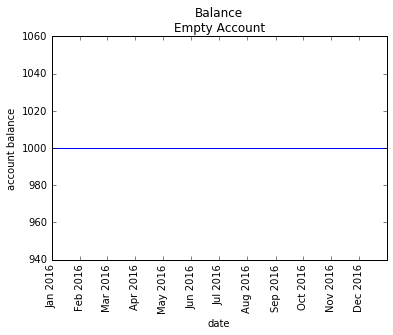

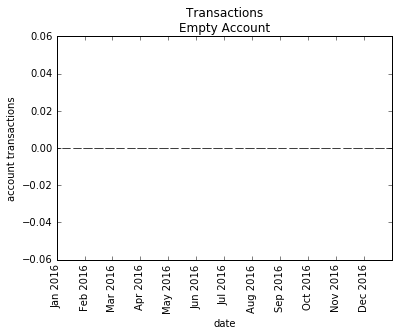

In [62]:
# Megan's Account

# Starting balance, start 1/1/16
account = RealDateAccount(date(2016,1,1),1000)

start_date, end_date = date(2016,1,1), date(2017,1,1)
plot_account(account, start_date, end_date, title='Empty Account')

In [63]:
print 'Day of week for account opening:', account.get_opening_date().strftime("%A")

Day of week for account opening: Friday


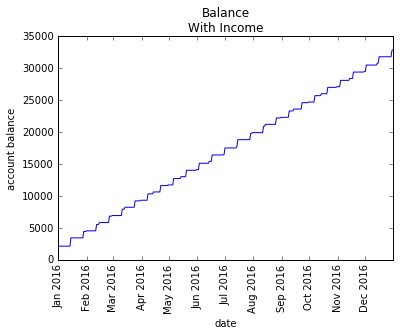

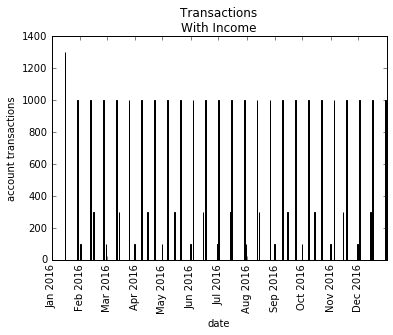

In [64]:
# Income every other Fri
account.add_day_based_transaction(1000, 14)
# Income 1st of month
account.add_monthly_transaction(100, 1)
# Income 15th of month
account.add_monthly_transaction(300, 15)

plot_account(account, start_date, end_date, title='With Income')

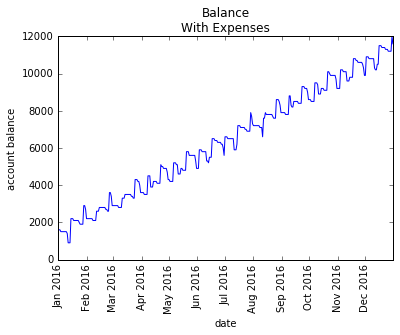

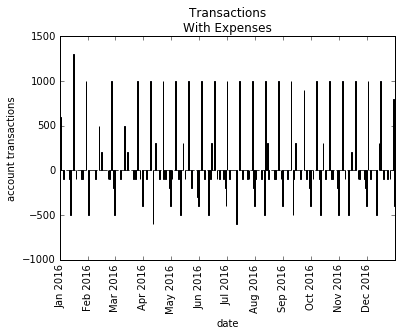

In [65]:
# Monthly rent on 1st
account.add_monthly_transaction(-400, 1)
# Monthly credit card on 12th
account.add_monthly_transaction(-500, 12)
# Monthly car insurence on 24th
account.add_monthly_transaction(-100, 24)
# Weekly horseback riding, available on Mon (starts on Fri)
account.add_day_based_transaction(-100, 7, 3)
# Monthly groceries at the end of the month
account.add_monthly_transaction(-200, 31)
# Monthly health insurence
account.add_monthly_transaction(-100, 1)

plot_account(account, start_date, end_date, title='With Expenses')

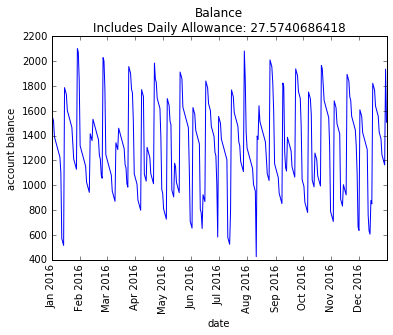

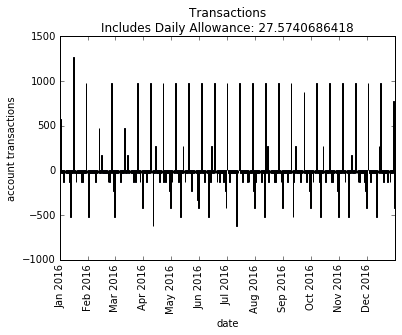

In [66]:
# Add in Daily Allowance
plot_account(account, start_date, end_date, True, 'Includes Daily Allowance: ' + str(account.get_daily_allowance()))

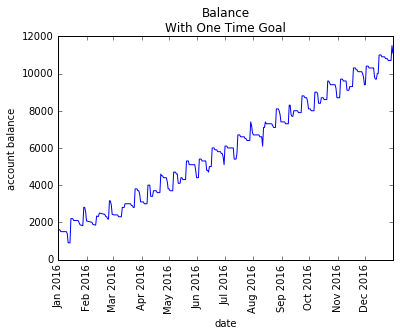

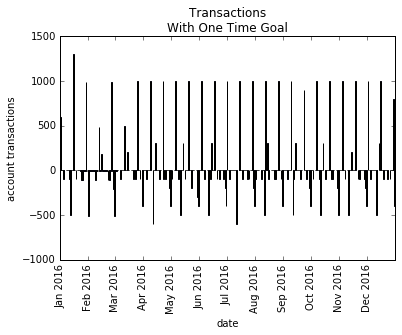

In [67]:
# Trip savings goal
account.add_goal(500, date(2016,3,3), 40)
plot_account(account, start_date, end_date, title='With One Time Goal')

In [68]:
# Look at transactions
print 'Transactions:'
pp.pprint(account.get_constituent_transactions())

Transactions:
{   0: DayBasedTransaction(amount:1000, period:14, offset:0),
    1: MonthlyTransaction(amount:100, day of month:0),
    2: MonthlyTransaction(amount:300, day of month:14),
    3: MonthlyTransaction(amount:-400, day of month:0),
    4: MonthlyTransaction(amount:-500, day of month:11),
    5: MonthlyTransaction(amount:-100, day of month:23),
    6: DayBasedTransaction(amount:-100, period:7, offset:3),
    7: MonthlyTransaction(amount:-200, day of month:30),
    8: MonthlyTransaction(amount:-100, day of month:0),
    9: ExpenseGoal(amount:-500, completion day:62, duration:40)}


Removed? False
Removed? False
Removed? False
Removed? True


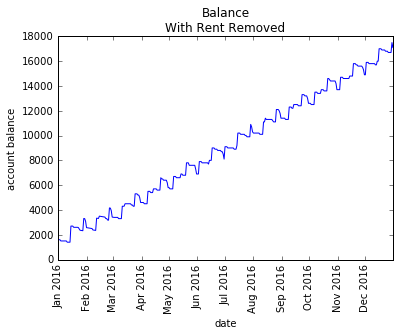

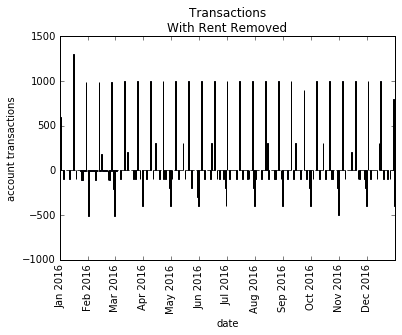

In [69]:
# Not possible to remove any income without going in the red...
print 'Removed?', account.remove_transaction(0)
print 'Removed?', account.remove_transaction(1)
print 'Removed?', account.remove_transaction(2)

# But we can remove an expense
print 'Removed?', account.remove_transaction(4)
plot_account(account, start_date, end_date, title='With Rent Removed')